Kostenvergleich Auto vs. GA
In diesem Notebook bestimmen wir den Schnittpunkt, ab dem ein Generalabonnement (GA) günstiger ist als ein eigenes Auto.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Einlesen der CSV-Datei
fahrzeuge = pd.read_csv('../data/processed/public_transport_vs_car/Auto Kosten.csv')

# Anzeige der Tabelle
fahrzeuge

,Fahrzeugklasse,Marke,Modell,Kaufpreis (CHF),Fixkosten (CHF/Jahr),Variable Kosten (CHF/km),Verbrauch,Verbrauchseinheit,Antrieb,Quelle
0,Kleinwagen Benziner,Volkswagen,Polo,22000,3600,0.22,5.5,L/100km,Benzin,comparis.ch / auto-illustrierte.ch
1,Kleinwagen Elektro,Renault,Zoe,27000,3400,0.14,17.0,kWh/100km,Elektro,comparis.ch / auto-illustrierte.ch
2,Mittelklassewagen Benziner,Skoda,Octavia,37000,4700,0.26,7.0,L/100km,Benzin,TCS / auto-illustrierte.ch
3,Mittelklassewagen Elektro,Tesla,Model 3,42000,4500,0.16,18.0,kWh/100km,Elektro,TCS / gogreen.ch
4,Oberklassewagen Benziner,BMW,5er,82000,7200,0.38,9.5,L/100km,Benzin,comparis.ch / carify.com
5,Oberklassewagen Elektro,Mercedes-Benz,EQE,87000,7000,0.22,20.0,kWh/100km,Elektro,TCS / auto-illustrierte.ch


In [ ]:
import pandas as pd
# CSV-Datei einlesen
ga_preise = pd.read_csv('GA Preise 2025.csv')

# Nur die gewünschten GA-Typen auswählen
gewuenschte_typen = [
    "GA Erwachsene", 
    "GA 25-Jährige", 
    "GA Jugend", 
    "GA Senioren", 
    "GA Duo Partner"
]

# Filtern
ga_gefiltert = ga_preise[ga_preise["GA-Typ"].isin(gewuenschte_typen)]

# Ausgabe
ga_gefiltert

,GA-Typ,Zielgruppe,2. Klasse (CHF),1. Klasse (CHF)
0,GA Erwachsene,ab 25 Jahren,3995,6520
1,GA 25-Jährige,25 Jahre,3495,5670
2,GA Jugend,16–25 Jahre,2780,4450
3,GA Senioren,ab 64/65 Jahren,3040,4950
6,GA Duo Partner,im gleichen Haushalt,2860,4450


📚 1. Mathematische Modellierung

Auto: K Auto(km) = Fixkosten + (variable Kosten pro km × km)

GA: K GA(km) = GA-Kosten (konstant)

In [ ]:
# Kostenfunktion Auto
def kosten_auto(fixkosten, variable_kosten_pro_km, km):
    return fixkosten + variable_kosten_pro_km * km

# Kostenfunktion GA (konstant)
def kosten_ga(ga_kosten, km):
    return [ga_kosten] * len(km)

📚 3. Schnittpunkt Auto vs. GA
Gesucht ist der Break-even Punkt (ab welchem km lohnt sich GA mehr):

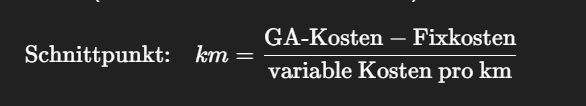

In [6]:
# Berechnung Break-even (Schnittpunkt)
def berechne_schnittpunkt(fixkosten, variable_kosten_pro_km, ga_kosten):
    km = (ga_kosten - fixkosten) / variable_kosten_pro_km
    return km

In [ ]:
# Funktion zur Berechnung des Break-even-Punktes
def berechne_schnittpunkt(fixkosten, variable_kosten_pro_km, ga_kosten):
    return (ga_kosten - fixkosten) / variable_kosten_pro_km

# GA Varianten als Dictionary für 2. und 1. Klasse
ga_varianten_2kl = dict(zip(ga_gefiltert["GA-Typ"], ga_gefiltert["2. Klasse (CHF)"]))
ga_varianten_1kl = dict(zip(ga_gefiltert["GA-Typ"], ga_gefiltert["1. Klasse (CHF)"]))

# Schleife über alle Fahrzeuge
for index, row in fahrzeuge.iterrows():
    fixkosten_auto = row["Fixkosten (CHF/Jahr)"]
    variable_kosten_auto = row["Variable Kosten (CHF/km)"]
    antrieb = row["Antrieb"]

    print(f"\n🚗 Fahrzeug: {row['Marke']} {row['Modell']} ({antrieb})")

    # GA 2. Klasse
    print("  🔵 2. Klasse:")
    for ga_typ, ga_kosten in ga_varianten_2kl.items():
        km_schnitt = berechne_schnittpunkt(fixkosten_auto, variable_kosten_auto, ga_kosten)
        print(f"    - {ga_typ}: Break-even bei {km_schnitt:.0f} km pro Jahr")

    # GA 1. Klasse
    print("  🟠 1. Klasse:")
    for ga_typ, ga_kosten in ga_varianten_1kl.items():
        km_schnitt = berechne_schnittpunkt(fixkosten_auto, variable_kosten_auto, ga_kosten)
        print(f"    - {ga_typ}: Break-even bei {km_schnitt:.0f} km pro Jahr")



🚗 Fahrzeug: Volkswagen Polo (Benzin)
  🔵 2. Klasse:
    - GA Erwachsene: Break-even bei 1795 km pro Jahr
    - GA 25-Jährige: Break-even bei -477 km pro Jahr
    - GA Jugend: Break-even bei -3727 km pro Jahr
    - GA Senioren: Break-even bei -2545 km pro Jahr
    - GA Duo Partner: Break-even bei -3364 km pro Jahr
  🟠 1. Klasse:
    - GA Erwachsene: Break-even bei 13273 km pro Jahr
    - GA 25-Jährige: Break-even bei 9409 km pro Jahr
    - GA Jugend: Break-even bei 3864 km pro Jahr
    - GA Senioren: Break-even bei 6136 km pro Jahr
    - GA Duo Partner: Break-even bei 3864 km pro Jahr

🚗 Fahrzeug: Renault Zoe (Elektro)
  🔵 2. Klasse:
    - GA Erwachsene: Break-even bei 4250 km pro Jahr
    - GA 25-Jährige: Break-even bei 679 km pro Jahr
    - GA Jugend: Break-even bei -4429 km pro Jahr
    - GA Senioren: Break-even bei -2571 km pro Jahr
    - GA Duo Partner: Break-even bei -3857 km pro Jahr
  🟠 1. Klasse:
    - GA Erwachsene: Break-even bei 22286 km pro Jahr
    - GA 25-Jährige: Break-

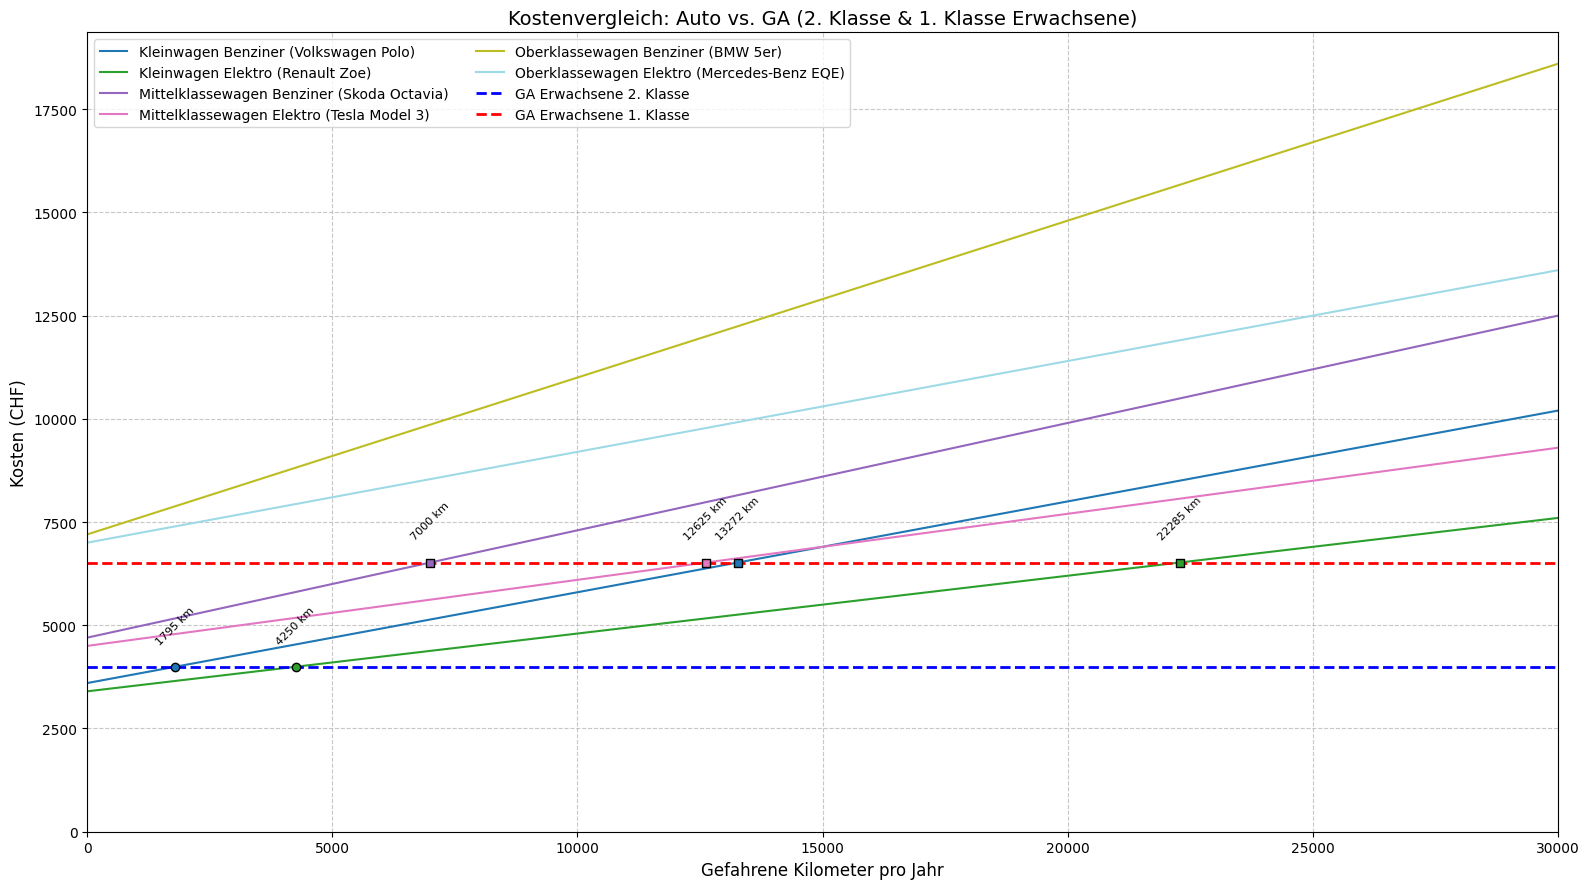

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Kilometerbereich definieren
km_werte = np.linspace(0, 30000, 500)

# Funktionen für Kostenmodelle
def kosten_auto(fixkosten, variable_kosten_pro_km, km):
    return fixkosten + variable_kosten_pro_km * km

def kosten_ga(ga_kosten, km):
    return np.full_like(km, ga_kosten)

def berechne_schnittpunkt(fixkosten, variable_kosten_pro_km, ga_kosten):
    return (ga_kosten - fixkosten) / variable_kosten_pro_km

# GA Preise laden
ga_varianten_2kl = dict(zip(ga_gefiltert["GA-Typ"], ga_gefiltert["2. Klasse (CHF)"]))
ga_varianten_1kl = dict(zip(ga_gefiltert["GA-Typ"], ga_gefiltert["1. Klasse (CHF)"]))

# Beispiel: GA Erwachsene
ga_erwachsene_2kl = ga_varianten_2kl["GA Erwachsene"]
ga_erwachsene_1kl = ga_varianten_1kl["GA Erwachsene"]

# Plot erstellen
plt.figure(figsize=(16, 9))

# Farben für Fahrzeuge
farben = plt.cm.tab20(np.linspace(0, 1, len(fahrzeuge)))

# Fahrzeuge plotten
for i, (index, row) in enumerate(fahrzeuge.iterrows()):
    kosten = kosten_auto(row["Fixkosten (CHF/Jahr)"], row["Variable Kosten (CHF/km)"], km_werte)
    plt.plot(km_werte, kosten, label=f"{row['Fahrzeugklasse']} ({row['Marke']} {row['Modell']})", color=farben[i])

    # Break-even 2. Klasse
    km_schnitt_2kl = berechne_schnittpunkt(
        row["Fixkosten (CHF/Jahr)"],
        row["Variable Kosten (CHF/km)"],
        ga_erwachsene_2kl
    )
    if 0 <= km_schnitt_2kl <= 30000:
        plt.scatter(km_schnitt_2kl, ga_erwachsene_2kl, color=farben[i], marker='o', edgecolors='black', zorder=5)
        plt.text(km_schnitt_2kl, ga_erwachsene_2kl + 500, f'{int(km_schnitt_2kl)} km', 
                 ha='center', va='bottom', fontsize=8, rotation=45)

    # Break-even 1. Klasse
    km_schnitt_1kl = berechne_schnittpunkt(
        row["Fixkosten (CHF/Jahr)"],
        row["Variable Kosten (CHF/km)"],
        ga_erwachsene_1kl
    )
    if 0 <= km_schnitt_1kl <= 30000:
        plt.scatter(km_schnitt_1kl, ga_erwachsene_1kl, color=farben[i], marker='s', edgecolors='black', zorder=5)
        plt.text(km_schnitt_1kl, ga_erwachsene_1kl + 500, f'{int(km_schnitt_1kl)} km', 
                 ha='center', va='bottom', fontsize=8, rotation=45)

# GA Linien plotten
plt.plot(km_werte, kosten_ga(ga_erwachsene_2kl, km_werte), 'b--', linewidth=2, label="GA Erwachsene 2. Klasse")
plt.plot(km_werte, kosten_ga(ga_erwachsene_1kl, km_werte), 'r--', linewidth=2, label="GA Erwachsene 1. Klasse")

# Plot Einstellungen
plt.xlabel("Gefahrene Kilometer pro Jahr", fontsize=12)
plt.ylabel("Kosten (CHF)", fontsize=12)
plt.title("Kostenvergleich: Auto vs. GA (2. Klasse & 1. Klasse Erwachsene)", fontsize=14)
plt.legend(ncol=2, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 30000)
plt.ylim(0)
plt.tight_layout()
plt.show()
